In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt         

### Read fetched data from script fetch_riot_api.py - data source:
- Fetched from Riot Developer API using `fetch_riot_api.py`
- Initial dataset: 9,778 rows (all participants from all matches)
- 45 attributes extracted per participant
- Each match has 10 participants (5 vs 5)

In [47]:
df = pd.read_excel("all_matches_data_py.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9778 entries, 0 to 9777
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   matchId                      9778 non-null   object 
 1   queueId                      9778 non-null   int64  
 2   gameMode                     9778 non-null   object 
 3   gameType                     9778 non-null   object 
 4   championName                 9778 non-null   object 
 5   summonerName                 8727 non-null   object 
 6   win                          9778 non-null   bool   
 7   gameEndedInSurrender         9778 non-null   bool   
 8   gameEndedInEarlySurrender    9778 non-null   bool   
 9   kills                        9778 non-null   int64  
 10  deaths                       9778 non-null   int64  
 11  assists                      9778 non-null   int64  
 12  goldEarned                   9778 non-null   int64  
 13  goldSpent         

### First glance at data
- one match has 10 entries for each participant (5 vs 5 games)
- metadata fetched such as gameMode, championName and in-game metrics

In [48]:
df.head()

,matchId,queueId,gameMode,gameType,championName,summonerName,win,gameEndedInSurrender,gameEndedInEarlySurrender,kills,...,wardsKilled,killingSprees,longestTimeSpentLiving,totalTimeSpentDead,bountyLevel,spell1Casts,spell2Casts,spell3Casts,spell4Casts,timePlayed
0,EUW1_7678031335,450,ARAM,MATCHED_GAME,Akali,NaN,True,False,False,13,...,0,4,319,194,NaN,81,22,40,16,1239
1,EUW1_7678031335,450,ARAM,MATCHED_GAME,Kindred,NaN,True,False,False,9,...,0,1,168,306,NaN,109,42,9,6,1236
2,EUW1_7678031335,450,ARAM,MATCHED_GAME,Riven,NaN,True,False,False,20,...,0,6,215,267,NaN,185,45,72,18,1239
3,EUW1_7678031335,450,ARAM,MATCHED_GAME,Ezreal,NaN,True,False,False,21,...,0,5,257,178,NaN,241,62,41,15,1236
4,EUW1_7678031335,450,ARAM,MATCHED_GAME,Janna,NaN,True,False,False,3,...,0,1,326,143,NaN,90,50,91,9,1239


### Preprocessing: only interested in my games with account "euclidean aatrox"
- 892 games
- include all game types (normal, ranked, draft, ARAM)
- overall number of games seem to be low since it fetches all data from 2021 -> suspect the problem is with a name change I did
- kept all game types to have a higher number of games to analyze

In [49]:
df = df[df["summonerName"] == "euclidean aatrox"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 816 to 9776
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   matchId                      892 non-null    object 
 1   queueId                      892 non-null    int64  
 2   gameMode                     892 non-null    object 
 3   gameType                     892 non-null    object 
 4   championName                 892 non-null    object 
 5   summonerName                 892 non-null    object 
 6   win                          892 non-null    bool   
 7   gameEndedInSurrender         892 non-null    bool   
 8   gameEndedInEarlySurrender    892 non-null    bool   
 9   kills                        892 non-null    int64  
 10  deaths                       892 non-null    int64  
 11  assists                      892 non-null    int64  
 12  goldEarned                   892 non-null    int64  
 13  goldSpent             

### Exploration: Which champions did I play? Fun Fact: Wukong is saved internally as "MonkeyKing"

In [50]:
print(df["championName"].unique())

['Thresh' 'Kennen' 'Volibear' 'Ekko' 'Camille' 'Leblanc' 'Illaoi' 'Velkoz'
 'XinZhao' 'Nocturne' 'Kaisa' 'Aatrox' 'LeeSin' 'Fiora' 'Karma' 'Nautilus'
 'Darius' 'Corki' 'Syndra' 'Chogath' 'Ryze' 'Gragas' 'Xerath' 'Kayn'
 'Blitzcrank' 'Lissandra' 'Leona' 'Orianna' 'Renekton' 'Nidalee' 'Anivia'
 'Gangplank' 'Rumble' 'Morgana' 'Shaco' 'Sylas' 'Gnar' 'Zac' 'Zed' 'Jayce'
 'MissFortune' 'Amumu' 'Zilean' 'Shen' 'Lucian' 'Vi' 'TwistedFate' 'Lux'
 'Akshan' 'RekSai' 'Pyke' 'Pantheon' 'Sett' 'Belveth' 'MonkeyKing'
 'Ezreal' 'Jinx' 'Ahri' 'Caitlyn' 'Khazix' 'Jhin' 'Swain' 'JarvanIV'
 'Graves' 'Tristana' 'Brand' 'Azir' 'Malzahar' 'Kindred' 'Yasuo'
 'Vladimir' 'Garen' 'Akali' 'Heimerdinger' 'Viego' 'Nasus' 'Poppy' 'Varus'
 'Ashe' 'Mordekaiser' 'Qiyana' 'Rakan' 'Warwick' 'TahmKench' 'Zyra'
 'Ivern' 'Riven' 'Shyvana' 'Elise' 'Twitch' 'Olaf' 'Jax' 'Yone' 'Bard'
 'Irelia' 'Hwei' 'Neeko' 'Quinn' 'Katarina' 'Senna' 'Malphite' 'Vex'
 'Annie' 'Kassadin' 'Soraka' 'Veigar' 'Viktor' 'Sion' 'Lillia' 'Ornn'
 'Gal

### Preprocessing: Only interested in the toplane champs I play for this playstyle-analysis -> 92 games left

In [ ]:
top_champs = ["Camille", "Aatrox"]
df = df[df["championName"].isin(top_champs)]
print(df["championName"].unique())
print(len(df))

['Camille' 'Aatrox']
92


### Exploration: Investigate pre-selected attributes to select final subset

In [ ]:
df.describe()

,queueId,kills,deaths,assists,goldEarned,goldSpent,totalMinionsKilled,baronKills,dragonKills,turretKills,...,wardsKilled,killingSprees,longestTimeSpentLiving,totalTimeSpentDead,bountyLevel,spell1Casts,spell2Casts,spell3Casts,spell4Casts,timePlayed
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,508.695652,14.423913,10.945652,18.010870,15050.108696,13747.282609,72.847826,0.0,0.043478,0.728261,...,0.184783,3.869565,246.076087,324.021739,3.706522,148.923913,36.467391,90.510870,9.684783,1333.347826
std,287.785090,7.547991,4.519467,9.991749,3811.034792,3334.386041,72.140116,0.0,0.253028,0.973306,...,0.627735,2.373005,267.390780,207.492723,6.878120,61.014722,13.044683,43.114082,3.473382,387.306575
min,400.000000,1.000000,1.000000,0.000000,5749.000000,5050.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,76.000000,12.000000,0.000000,47.000000,7.000000,28.000000,3.000000,650.000000
25%,450.000000,8.750000,8.000000,9.000000,12972.000000,11731.000000,29.750000,0.0,0.000000,0.000000,...,0.000000,2.000000,112.750000,221.000000,0.000000,105.500000,27.000000,61.500000,7.000000,1047.750000
50%,450.000000,14.000000,11.000000,18.000000,15115.000000,13850.000000,45.000000,0.0,0.000000,0.000000,...,0.000000,3.000000,151.000000,296.000000,1.000000,131.500000,33.500000,80.000000,10.000000,1258.000000
75%,450.000000,20.000000,14.000000,27.000000,17366.500000,16368.750000,83.000000,0.0,0.000000,1.000000,...,0.000000,6.000000,235.250000,375.500000,4.000000,186.750000,47.000000,107.000000,12.000000,1525.500000
max,1700.000000,41.000000,24.000000,39.000000,23676.000000,20250.000000,312.000000,0.0,2.000000,6.000000,...,3.000000,12.000000,1400.000000,1382.000000,41.000000,335.000000,76.000000,246.000000,17.000000,2593.000000


### Why these features?
- KDA: Core performance metrics
- Gold/CS: Economy indicators
- Damage: Combat effectiveness
- Wards: Map control
- Time metrics: Game pacing

In [ ]:
final_attr = ["matchId", "win", # Metadata
              "kills", "deaths", "assists", # KDA
              "goldEarned", "totalMinionsKilled", "turretKills", "totalDamageDealtToChampions", "damagePerMinute", # Damage
              "wardsPlaced", "longestTimeSpentLiving", "totalTimeSpentDead", "timePlayed", # Time
              "spell1Casts", "spell2Casts", "spell3Casts", "spell4Casts"] # Spells

df = df[final_attr]
df.info()
df.head()

### EDA: Plot correlation matrix with focus on combat stats - dropping unnessesary or correlated attributes
There is multicollinearity between kills, gold and damage since they are driven by the same underlying process. Dealing damage leads to kills and kills give gold therefore they move all together.
- kills-goldEarned (0.78)
- kills-totalDamageDealtToChampions (0.78)
- goldEarned-total-DamageDealtToChampions (0.84)

As longer the game goes and progresses into late game, its less about skirmishes and more about controlling the game with wards and minions killed (farming).
- timePlayed-totalMinionsKilled (0.78)
- timePlayed-wardsPlaced (0.79)

There are also negative correlations that can be interpreted:
- deaths-longestTimeSpentLiving (-0.53): More deaths = less time alive (obvious but validates data)
- deaths-wardsPlaced (-0.47): More deaths = less vision control (could indicate aggressive play)
- deaths-totalMinionsKilled (-0.29): More deaths = less farming (time spent dead)

There are also interesting correlations that can not be interpreted clearly.
- deaths-assists (0.61): hard to make sense of -> one interpretation is that I tend to trade 1 for 1 meaning trading my own life for an assist
- totalMinionsKilled-longestTimeSpentLiving (0.71): the more minions I kill, the longer I am deathless because I am focused on farming/controlling the game rather than snowballing through kills/combat
- wardsPlaced-totalMinionsKilled (0.90): wards placed indicate a controlled playstyle including killing minions with less combat
- wardsPlaced-longestTimeSpentLiving (0.80): more wards placed (vision) help to stay deathless longer

In [ ]:
# EDA - correlation with focus on combat stats    
df_numeric = df.drop(columns=["matchId", "win", "turretKills", "damagePerMinute", "totalTimeSpentDead", "spell1Casts", "spell2Casts", "spell3Casts", "spell4Casts"])
df_numeric.head()

,kills,deaths,assists,goldEarned,totalMinionsKilled,totalDamageDealtToChampions,wardsPlaced,longestTimeSpentLiving,timePlayed
858,7,9,17,9606,20,17711,0,123,848
950,7,3,4,9979,140,27024,5,418,1199
970,2,11,3,9797,191,21521,9,391,1871
985,2,9,0,8018,179,14946,3,267,1501
1005,9,5,7,16841,262,42478,11,1189,2156


,kills,deaths,assists,goldEarned,totalMinionsKilled,totalDamageDealtToChampions,wardsPlaced,longestTimeSpentLiving,timePlayed
kills,1.000000,0.438144,0.351971,0.786375,-0.055561,0.792836,-0.228638,-0.183903,0.079253
deaths,0.438144,1.000000,0.615443,0.505770,-0.288911,0.500445,-0.467387,-0.531240,-0.009739
assists,0.351971,0.615443,1.000000,0.453655,-0.471692,0.367941,-0.570790,-0.439581,-0.233214
goldEarned,0.786375,0.505770,0.453655,1.000000,0.146735,0.836825,-0.015728,0.015956,0.467987
totalMinionsKilled,-0.055561,-0.288911,-0.471692,0.146735,1.000000,0.065362,0.905063,0.710757,0.773205
totalDamageDealtToChampions,0.792836,0.500445,0.367941,0.836825,0.065362,1.000000,-0.097300,-0.103660,0.364519
wardsPlaced,-0.228638,-0.467387,-0.570790,-0.015728,0.905063,-0.097300,1.000000,0.797329,0.759740
longestTimeSpentLiving,-0.183903,-0.531240,-0.439581,0.015956,0.710757,-0.103660,0.797329,1.000000,0.591645
timePlayed,0.079253,-0.009739,-0.233214,0.467987,0.773205,0.364519,0.759740,0.591645,1.000000


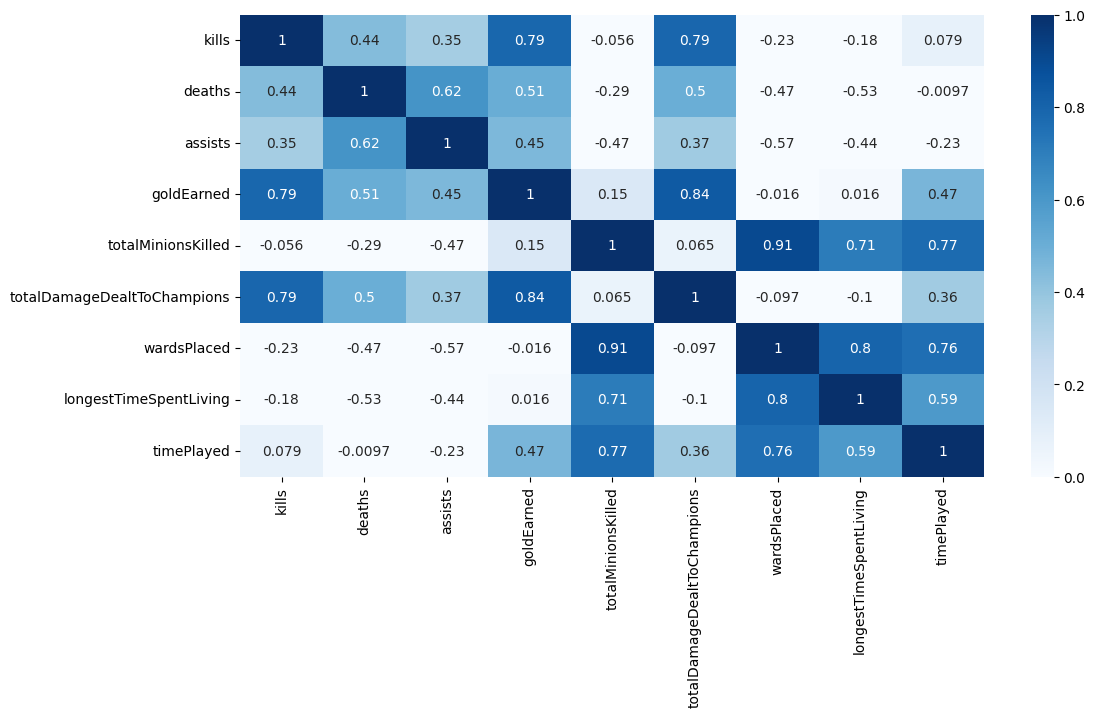

In [ ]:
corr = df_numeric.corr(method="pearson")
display(corr)

corr_heatmap = plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap="Blues", annot=True, vmin=0, vmax=1)
plt.show()

### EDA: Distribution of the main game-stat KDA (Kill/Death/Assist)
**Observations:**
- Assists have the highest median (typical for top lane - teamfight participation)
- Kills show moderate values (consistent with top lane role)
- Deaths are relatively low (good survival)
- All three metrics have similar Q1 values (~9), suggesting consistent 
  participation in combat across games
  
 **Interpretation:**
This distribution pattern (high assists, medium kills, low deaths) is 
consistent with a fighting-oriented playstyle where I participate actively 
in teamfights and skirmishes.

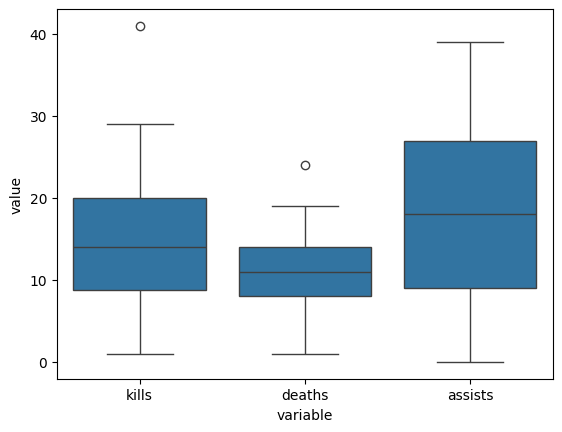

In [ ]:
df_kda = pd.melt(df[['kills', 'deaths', 'assists']])
ax_kda = plt.figure()
sns.boxplot(data=df_kda, x='variable', y='value')
plt.show()
plt.close(ax_kda)

### EDA: Look at distributions of rest of the atttributes with histograms
Includes aram games which have no wards, shorter gametime and lower minionskilled naturally -> keep that in mind for interpretation
- goldEarned: normally distributed (slightly left-skewed) -> most games end with a gold earned of ~15k which equal to roughly 5 items
- totalDamageDealtToChampions: right-skewed -> most games within 30k-40k damage with individual outliers with high damage games
- totalMinionsKilled: heavily right-skewed -> mainly 25-50 minions (aram games) and then the normal games
- wardsPlaced: extreme right-skew due to 0 values (aram games) -> else around 9 wards and max 14
- longestTimeSpentLiving: strong right skew -> mainly 200-300 seconds (aram) the normal games seem to be around 1000-1400
- timePlayed: bell-shaped with right-skew -> 17-25 minutes (aram games) and normales games around double the game time

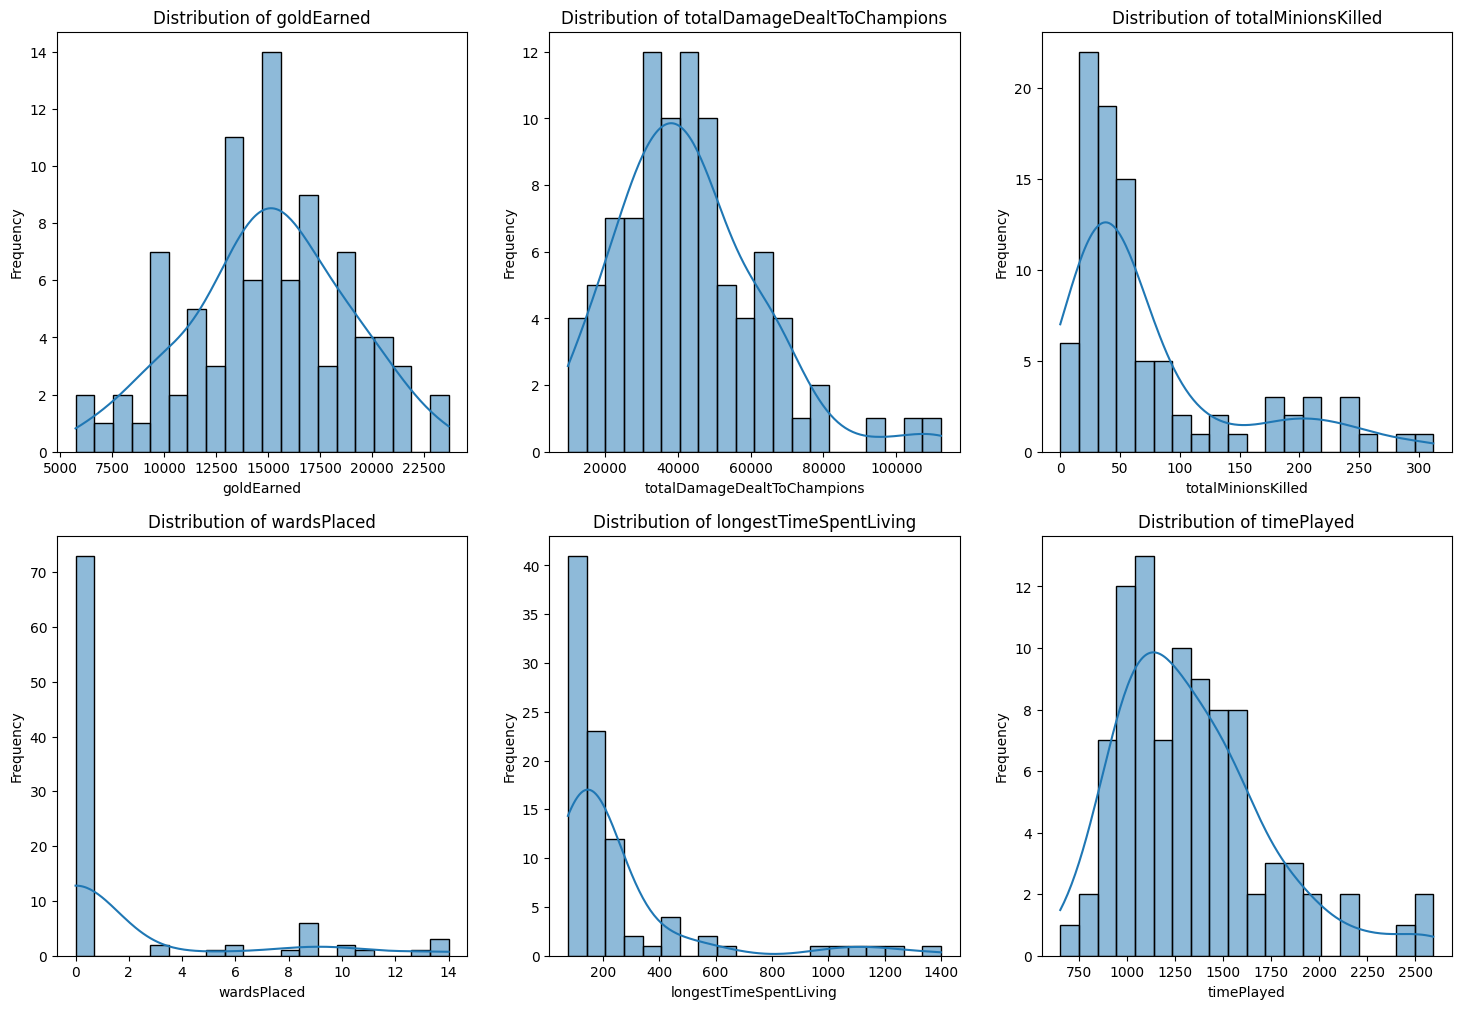

In [ ]:
attributes_to_plot = [
    'goldEarned',
    'totalDamageDealtToChampions',
    'totalMinionsKilled', 
    'wardsPlaced',
    'longestTimeSpentLiving',
    'timePlayed'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, attr in enumerate(attributes_to_plot):
    sns.histplot(data=df, x=attr, ax=axes[idx], bins=20, kde=True)
    axes[idx].set_title(f"Distribution of {attr}")
    axes[idx].set_xlabel(attr)
    axes[idx].set_ylabel("Frequency")

plt.show()

**Hypothesis:** Fighting-oriented playstyle → More damage → More kills → More gold

**Correlation Evidence:**
- kills vs totalDamageDealtToChampions: r = {correlation_value}
- goldEarned vs totalDamageDealtToChampions: r = {correlation_value}
- kills vs goldEarned: r = {correlation_value}

**Interpretation:**
The positive correlations support that these three attributes move together, 
which aligns with an aggressive playstyle where fighting leads to kills, 
which provide gold, enabling more damage output. In comparison a controlled playstyle (midlane mages) would be higher minionskilled, lower deaths and kills.

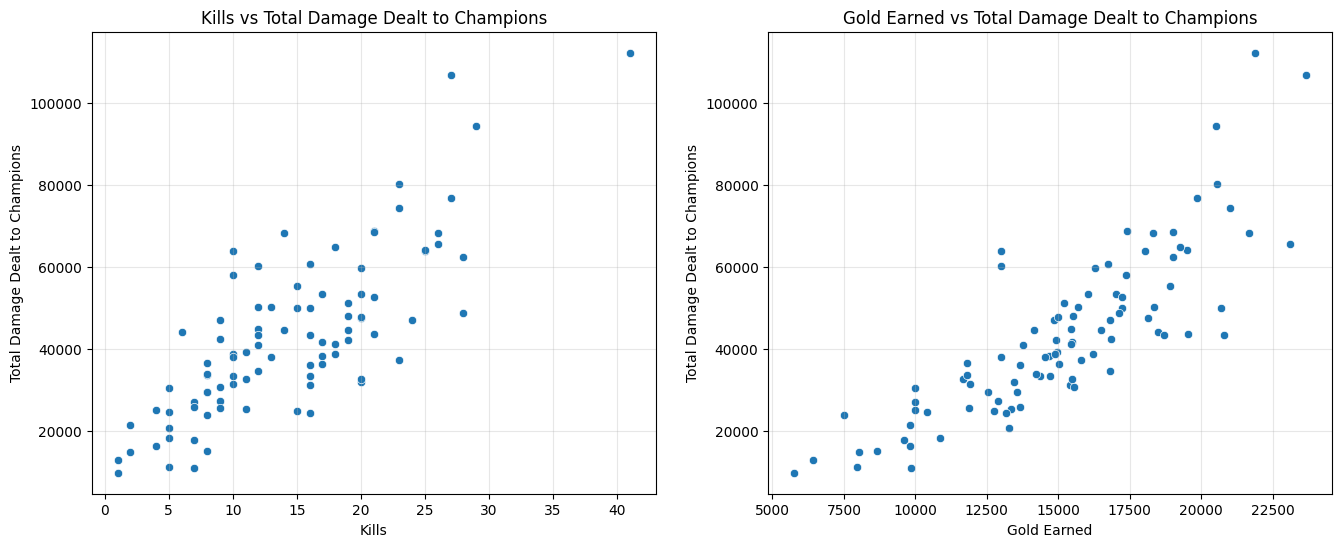

In [59]:
# Plot two scatter plots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First scatter plot: kills vs totalDamageDealtToChampions
sns.scatterplot(data=df, x="kills", y="totalDamageDealtToChampions", ax=axes[0])
axes[0].set_title("Kills vs Total Damage Dealt to Champions")
axes[0].set_xlabel("Kills")
axes[0].set_ylabel("Total Damage Dealt to Champions")
axes[0].grid(alpha=0.3)

# Second scatter plot: goldEarned vs totalDamageDealtToChampions
sns.scatterplot(data=df, x="goldEarned", y="totalDamageDealtToChampions", ax=axes[1])
axes[1].set_title("Gold Earned vs Total Damage Dealt to Champions")
axes[1].set_xlabel("Gold Earned")
axes[1].set_ylabel("Total Damage Dealt to Champions")
axes[1].grid(alpha=0.3)

plt.show()

**Observation:**
Winning games show higher median damage (~55-60k) vs losing games (~35-40k).

**Statistical Test Results:**
- T-test: t = 1.77, p = 0.0798 (not significant at α = 0.05)
- Mean difference: 7,433 damage (wins have higher damage)

**Interpretation:**
The p-value of 0.0798 indicates the difference is **not statistically 
significant** at the conventional α = 0.05 level. However, it's close to 
significance (p < 0.10), suggesting a **trend** toward higher damage in 
winning games. The 7,433 damage difference (~20% increase) may be practically 
meaningful despite not reaching statistical significance, which could be due 
to limited sample size (92 games) reducing statistical power. The relationship 
could be bidirectional:
- High damage → Wins (aggressive playstyle leads to victory)
- Wins → High damage (winning enables more damage through snowball effect)

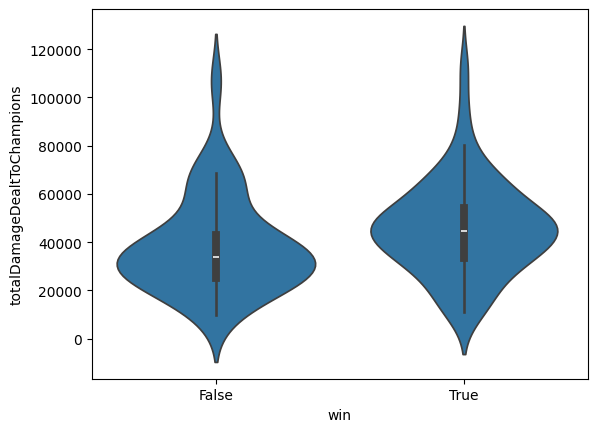

In [60]:
sns.violinplot(data=df, x="win", y="totalDamageDealtToChampions")
plt.show()

In [62]:
#Statistical Test:
from scipy import stats
win_damage = df[df['win'] == True]['totalDamageDealtToChampions']
loss_damage = df[df['win'] == False]['totalDamageDealtToChampions']

t_stat, p_value = stats.ttest_ind(win_damage, loss_damage)
print(f"T-test: t={t_stat:.2f}, p={p_value:.4f}")
print(f"Mean difference: {win_damage.mean() - loss_damage.mean():.0f} damage")

T-test: t=1.77, p=0.0798
Mean difference: 7433 damage
